['race_cards_2023-12.json', 'race_cards_2024-01.json']


100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


-----------------------------------
Race: 6565981
Offer: Odds for Mr Josiey Wales: 25.0
Stakes: 0.1489046444887778
Payout: -0.1489046444887778
-----------------------------------

-----------------------------------
Race: 6565991
Offer: Odds for Nordano: 19.5
Stakes: 0.1316968833817102
Payout: 0.0
-----------------------------------

-----------------------------------
Race: 6565992
Offer: Odds for Lifetime Legend: 12.0
Stakes: 0.10007083291111529
Payout: 0.0
-----------------------------------

-----------------------------------
Race: 6565997
Offer: Odds for Just A Spark: 11.0
Stakes: 0.10570821199604596
Payout: 1.028012361661547
-----------------------------------

-----------------------------------
Race: 6563711
Offer: Odds for Matchless: 9.6
Stakes: 0.10600986441328897
Payout: -0.10600986441328897
-----------------------------------

-----------------------------------
Race: 6563715
Offer: Odds for Reserve Judgement: 13.5
Stakes: 0.10657362028394611
Payout: -0.10657362028394611
-

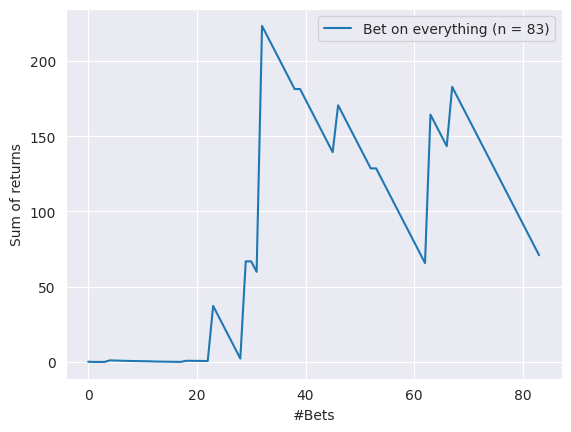

In [2]:
from Model.Betting.payout_calculation import BetfairPayoutCalculator
from Model.Betting.evaluate import PlaceBetEvaluator, WinBetEvaluator
from Model.Betting.bet import Bet
from typing import List
import os
from Persistence.RaceCardPersistence import RaceCardsPersistence
from tqdm import tqdm
from Model.Betting.race_results_container import RaceResultsContainer
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from numpy import cumsum

def plot_test_bets_return(test_bets: List[Bet], axis, label: str) -> None:
    payout_values = [0.0] + [bet.payout for bet in test_bets]
    date_values = list(range(len(payout_values)))
    cum_payout_values = cumsum(payout_values)
    label = f"{label} (n = {len(test_bets)})"
    print(date_values)
    sns.lineplot(ax=axis, x=date_values, y=cum_payout_values, label=label)

TEST_BETS_PATH = "../data/bets_log"
test_bets = []

for file_name in os.listdir(TEST_BETS_PATH):
    if os.path.isfile(f"{TEST_BETS_PATH}/{file_name}"):
        with open(f"{TEST_BETS_PATH}/{file_name}", "rb") as f:
            test_bets += pickle.load(f)
    
race_cards_loader = RaceCardsPersistence("race_cards")
race_results_container = RaceResultsContainer()

test_sample_file_names = race_cards_loader.race_card_file_names[-2:]

print(test_sample_file_names)

for race_card_file_name in tqdm(test_sample_file_names):
    race_cards = race_cards_loader.load_race_card_files_non_writable([race_card_file_name])
    race_results_container.add_results_from_race_cards(race_cards)
    
bet_evaluator = WinBetEvaluator()
payout_calculator = BetfairPayoutCalculator(bet_evaluator)

payout_calculator.insert_payouts_into_bets(test_bets, race_results_container.race_results)

for bet in test_bets:
    print(bet)

fig, axes = plt.subplots(1, 1)

axes.set(xlabel="#Bets", ylabel="Sum of returns")
plot_test_bets_return(test_bets=test_bets, axis=axes, label="Bet on everything")

In [3]:
import numpy as np

bets = test_bets_base
n_successful_bets = len([bet for bet in bets if bet.payout > 0])
n_bets = len([bet for bet in bets if bet.payout != 0])

print(n_successful_bets)
print(n_bets)
print(n_successful_bets / n_bets)
print(np.mean([bet.bet_offer.odds for bet in test_bets_base if bet.payout > 0]))

5
120
0.041666666666666664
20.759999999999998


In [4]:
for bet in test_bets_base:
    print(bet)

-----------------------------------
Race: 6411535
Offer: Odds for Clenched: 12.0
Stakes: 0.06289786688899544
Payout: -0.06289786688899544
-----------------------------------

-----------------------------------
Race: 6411540
Offer: Odds for Alexi Boy: 3.25
Stakes: 0.05117977990976533
Payout: -0.05117977990976533
-----------------------------------

-----------------------------------
Race: 6409391
Offer: Odds for Pour Me A Drink: 9.0
Stakes: 0.00636915833092247
Payout: -0.00636915833092247
-----------------------------------

-----------------------------------
Race: 6411539
Offer: Odds for Pop Dancer: 5.8
Stakes: 0.010845725744067133
Payout: -0.010845725744067133
-----------------------------------

-----------------------------------
Race: 6417045
Offer: Odds for Sir Psycho: 4.9
Stakes: 0.06010038082627219
Payout: 0.22702918857124318
-----------------------------------

-----------------------------------
Race: 6417046
Offer: Odds for Cap Du Mathan: 4.2
Stakes: 0.013575863334212013
P

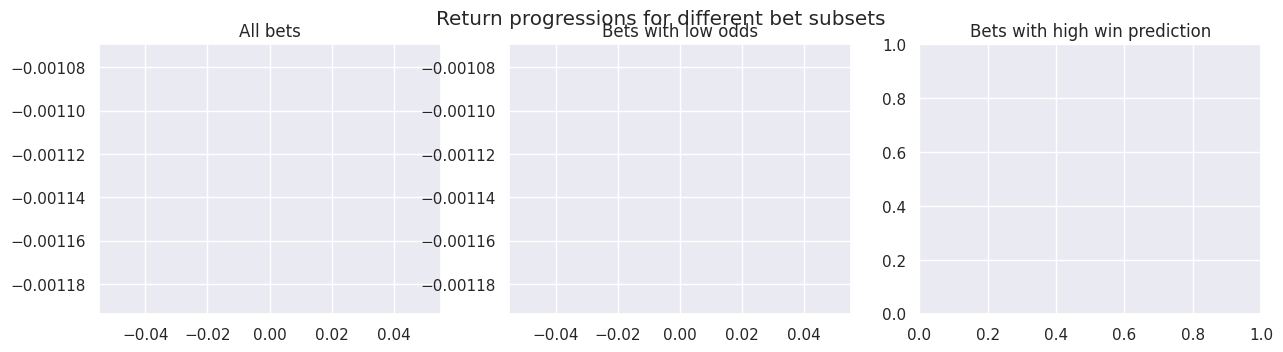

In [14]:
from Model.Betting.bet import Bet
from typing import List
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import cumsum

sns.set(rc={'figure.figsize':(15,3.5)})

def plot_test_bets_return(axis, test_bets: List[Bet]) -> None:
    payout_values = [bet.payout for bet in test_bets]
    x = [i for i in range(len(payout_values))]
    cum_payout_values = cumsum(payout_values)
    sns.lineplot(ax=axis, x=x, y=cum_payout_values)

fig, axes = plt.subplots(1, 3)
fig.suptitle('Return progressions for different bet subsets')

axes[0].set_title("All bets")
plot_test_bets_return(axis=axes[0], test_bets=test_bets_base)

test_bets_low_odds = [bet for bet in test_bets_base if bet.bet_offer.odds < 20]
axes[1].set_title("Bets with low odds")
plot_test_bets_return(axis=axes[1], test_bets=test_bets_low_odds)

test_bets = [bet for bet in test_bets_base if bet.probability_estimate > 0.25]
axes[2].set_title("Bets with high win prediction")
plot_test_bets_return(axis=axes[2], test_bets=test_bets)